# Get Training Data

In [1]:
import os
import sys
from pathlib import Path # if you haven't already done so
file = Path(os.getcwd()).resolve()
parent, root = file.parent, file.parents[1]
print(parent, root)
sys.path.append(str(parent))
# sys.path.append("..")

# # Additionally remove the current file's directory from sys.path
# try:
#     sys.path.remove(str(parent))
# except ValueError: # Already removed
#     pass

/home/VD/fruitao/drone/logic_guided_prompt/code /home/VD/fruitao/drone/logic_guided_prompt


In [2]:
from logic.description_logic import *
from utils.load_sensor_data import *
from data_augmentation.text_augmentation import *

/home/VD/fruitao/drone/logic_guided_prompt/code/data_augmentation /home/VD/fruitao/drone/logic_guided_prompt/code


2023-04-24 09:46:47.075371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 09:46:47.531232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-24 09:46:47.531262: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-24 09:46:49.104695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinf

In [3]:
# old_format_example=pd.ExcelFile(r"../text_annotation/rural.xlsx")

dataset_file_li=[r"../../text_annotation/desert.xlsx", r"../../text_annotation/disturbance.xlsx", r"../../text_annotation/factory.xlsx", r"../../text_annotation/island.xlsx", 
                 r"../../text_annotation/misc.xlsx", r"../../text_annotation/ocean.xlsx", r"../../text_annotation/rural.xlsx", r"../../text_annotation/urban.xlsx"
]

# dataset_file_li=[ r"../text_annotation/rural.xlsx"]

old_data_dic=dict()

for dataset_file in dataset_file_li:
    print("----processing file: {}----".format(dataset_file))
    
    old_format_example=pd.ExcelFile(dataset_file)

    ts_converters={'name': str, 'Type': str, 'Moving': str2bool, 'InPath': str2bool, 'time_stamp': str}
    status_converters={'PilotExperienced': str2bool, 'Low_visibility': str2bool, 'Normal_frame': str2bool,
                      'weather': str, 'upside_down': str2bool, 'good_motor_condition': str2bool,
                      'going_backwards': str2bool, 'indoor': str2bool, 'waterproof drone?': str2bool,
                      'flying over': str, 'criticality': str, 
                      'RiskOfPhysicalDamage': str, 'RiskOfInternalDamage': str2bool,
                      'RiskOfHumanDamage': str2bool, 'LostConnection': str2bool}
    text_converters={'Link':str, 'Text1':str, 'Text2':str}

    old_format_ts=pd.read_excel(old_format_example, sheet_name='timestep', converters=ts_converters)
    old_format_status=pd.read_excel(old_format_example, sheet_name='status', converters=status_converters)
    old_format_text=pd.read_excel(old_format_example, sheet_name='text', converters=text_converters)

    print("---loading sensor data---")
    load_ts_to_dict(old_format_ts, old_data_dic)
    load_status_to_dict(old_format_status, old_data_dic)
    load_text_to_dict(old_format_text, old_data_dic)

    # print("---generating templates---")
    for link, data in old_data_dic.items():
        templates, related_status_dic, related_timestep_dic = gen_templates(data)
        old_data_dic[link]['templates'] = templates
        old_data_dic[link]['related_status_dic'] = related_status_dic
        old_data_dic[link]['related_timestep_dic'] = related_timestep_dic


----processing file: ../../text_annotation/desert.xlsx----
---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': 

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

---loading sensor data---
--gen_templates-- related_status_dic:{'flying_not_normal_frame': [{'Normal_frame': False}]}
--gen_templates-- template:The drone is flying with a damaged frame.
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. T

In [4]:
# print("old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['timestep'][0]['time_stamp']:{}".format(old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['timestep'][0]['time_stamp']))
print("len(old_data_dic):{}".format(len(old_data_dic)))
print("--['text'][0]:{}".format(
    old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['text'][0]))
print("--['related_status_dic']:{}".format(
    old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['related_status_dic']))
print("--['related_timestep_dic']:{}".format(
    old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['related_timestep_dic']))
print("--['templates']:{}".format(
    old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['templates']))

len(old_data_dic):300
--['text'][0]:{'Text1': "Risk of Physical Damage! The drone has a damaged frame and empty battery. It's flying at an altitude of 5m. [SEP]\n(0:01) Risk of Physical Damage! There are two gravestones in the drone's flight path at a distance of 3m.  [SEP] \n(0:05) Risk of Physical Damage! Now there's a castle in the drone's flight path at a distance of 1m. [SEP]", 'Text2': "Risk of physical damage! The drone is flying with an empty battery. The frame is also damaged and the altitude is 5m. [SEP]\n(0:01) Risk of physical damage! There are two gravestones 3m away and in the drone's path. [SEP]\n(0:05) Risk of physical damage! The drone is flying toward a castle in its path which is only 1m away. [SEP]"}
--['related_status_dic']:{'flying_empty_battery': [{'Battery_level': 0}], 'flying_not_normal_frame': [{'Normal_frame': False}]}
--['related_timestep_dic']:{'reachable_inpath': [{'time_stamp': '0:01', 'name': 'gravestone 1', 'Distance': 3.0}, {'time_stamp': '0:01', 'name

In [5]:
print(old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing'].keys())

dict_keys(['timestep', 'status', 'text', 'templates', 'related_status_dic', 'related_timestep_dic'])


In [6]:
import json

link_li=[]
text_li=[]
dl_name_li=[]
templates_li=[]
related_sensor_data_li=[]
related_status_dic_li=[]
related_timestep_dic_li=[]
dl_related_sensor_data_mapping_li=[]

# templates_nested_li=[]
# related_status_dic_nested_li=[]
# related_timestep_dic_nested_li=[]
# related_sensor_data_nested_li=[]

# related_sensor_data_li as input and templates_li as label
for link, value in old_data_dic.items():
#     print("value:{}".format(value))
    link_li.append(link)
    if 'text' not in value:
        text_li.append([])
    else:    
        text_li.append(value['text'])
    dl_index=0
    
#     dl_related_sensor_data_mapping={}
#     related_status_dic_li=[]
#     related_timestep_dic_li=[]
#     related_sensor_data_li=[]
#     templates_li=[]
    for dl_name, template_value in value['templates'].items():
        templates_li.extend(template_value)
        if dl_name in value['related_status_dic']:
            related_status_dic_li.extend(value['related_status_dic'][dl_name])
            related_sensor_data_li.extend(value['related_status_dic'][dl_name])
        elif dl_name in value['related_timestep_dic']:
            related_timestep_dic_li.extend(value['related_timestep_dic'][dl_name])
            related_sensor_data_li.extend(value['related_timestep_dic'][dl_name])
        else:
            print("WHAT?")
        
related_sensor_data_li=[json.dumps(dic) for dic in related_sensor_data_li]
#         dl_related_sensor_data_mapping[dl_name]=[i+dl_index for i in range(len(template_value))]
#         dl_index+=len(template_value)
        
#     dl_related_sensor_data_mapping_li.append(dl_related_sensor_data_mapping)
#     related_status_dic_nested_li.append(related_status_dic_li)
#     related_timestep_dic_nested_li.append(related_timestep_dic_li)
#     templates_nested_li.append(templates_li)
#     related_sensor_data_nested_li.append(related_sensor_data_li)

In [7]:
import math
import random

def train_test_split(all_li, train_ratio=0.6):
    all_len=len(all_li)
    train_len=math.ceil(train_ratio*all_len)
    
    return all_li[:train_len], all_li[train_len:]

random.shuffle(related_sensor_data_li)
random.shuffle(templates_li)
train_sensor_data, test_sensor_data=train_test_split(related_sensor_data_li)
train_templates, test_templates=train_test_split(templates_li)

print(len(related_sensor_data_li), len(train_sensor_data), len(test_sensor_data))
print(len(templates_li), len(train_templates), len(test_templates))
    

1652 992 660
1652 992 660


In [8]:
# mapping{'flying_empty_battery':[0], 'flying_not_normal_frame':[1], 'reachable_inpath':[2, 3, 4]}
# input: [{'Battery_level': 0}, {'Normal_frame': False}, {'time_stamp': '0:01', 'name': 'gravestone 1', 'Distance': 3.0}, {'time_stamp': '0:01', 'name': 'gravestone 2', 'Distance': 3.0}, {'time_stamp': '0:05', 'name': 'castle ', 'Distance': 1.0}]
# output: 'The flying drone is runing out of battery with only 0% charge.'

print(len(related_sensor_data_li), related_sensor_data_li[0], type(related_sensor_data_li[0]))
print(len(templates_li), templates_li[0], type(templates_li[0]))
# print(dl_related_sensor_data_mapping_li[2])



1652 {"time_stamp": "0:08", "name": NaN, "Distance": 1.0} <class 'str'>
1652 (0:06) The drone is facing the risk of physical damage. It's flying too close to nan at a distance of 1.0m, and the pilot is not experienced. <class 'str'>


In [9]:
from torch.utils.data import Dataset

class drone_dataset(Dataset):
    def __init__(self, data_dic):
        self.data_dic=data_dic
        
    
    def __len__(self):
        return len(self.data_dic)
    
    def __getitem__(self, idx):
        return data_dic['related_status_dic'][0], data_dic['related_timestep_dic'], data_dic['text'][0]
    
    

# Augmented Prompt

In [10]:
!nvidia-smi

Mon Apr 24 09:47:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:1A:00.0 Off |                    0 |
| N/A   36C    P0    38W / 250W |   4828MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:1B:00.0 Off |                    0 |
| N/A   

In [11]:
import torch

device=torch.device("cuda:1")

In [12]:
import math

from tqdm import tqdm
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch.nn as nn
from sklearn.metrics import accuracy_score

In [13]:
class SoftEmbedding(nn.Module):
    def __init__(self, 
                wte: nn.Embedding,
                n_tokens: int = 10, 
                random_range: float = 0.5,
                initialize_from_vocab: bool = True):
        """appends learned embedding to 
        Args:
            wte (nn.Embedding): original transformer word embedding
            n_tokens (int, optional): number of tokens for task. Defaults to 10.
            random_range (float, optional): range to init embedding (if not initialize from vocab). Defaults to 0.5.
            initialize_from_vocab (bool, optional): initalizes from default vocab. Defaults to True.
        """
        super(SoftEmbedding, self).__init__()
        self.wte = wte
        self.n_tokens = n_tokens
        self.learned_embedding = nn.parameter.Parameter(self.initialize_embedding(wte,
                                                                               n_tokens, 
                                                                               random_range, 
                                                                               initialize_from_vocab))
            
    def initialize_embedding(self, 
                             wte: nn.Embedding,
                             n_tokens: int = 10, 
                             random_range: float = 0.5, 
                             initialize_from_vocab: bool = True):
        """initializes learned embedding
        Args:
            same as __init__
        Returns:
            torch.float: initialized using original schemes
        """
        if initialize_from_vocab:
            return self.wte.weight[:n_tokens].clone().detach()
        return torch.FloatTensor(n_tokens, wte.weight.size(1)).uniform_(-random_range, random_range)
            
    def forward(self, tokens):
        """run forward pass
        Args:
            tokens (torch.long): input tokens before encoding
        Returns:
            torch.float: encoding of text concatenated with learned task specifc embedding
        """
        input_embedding = self.wte(tokens[:, self.n_tokens:])
        learned_embedding = self.learned_embedding.repeat(input_embedding.size(0), 1, 1)
        return torch.cat([learned_embedding, input_embedding], 1)

In [14]:
n_tokens = 20
initialize_from_vocab = True

In [15]:
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")
# model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-xxl").to(device)
# tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-xxl")
n_tokens = len(WARNING_DL)
s_wte = SoftEmbedding(model.get_input_embeddings(), 
                      n_tokens=n_tokens, 
                      initialize_from_vocab=initialize_from_vocab)
model.set_input_embeddings(s_wte)
if torch.cuda.is_available():
    model = model.to(device)

/opt/conda/lib/python3.7/site-packages/transformers/models/t5/tokenization_t5.py:173: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [16]:
print(model.config.pad_token_id)

0


In [17]:
model.eval()

T5ForConditionalGeneration(
  (shared): SoftEmbedding(
    (wte): Embedding(32128, 768)
  )
  (encoder): T5Stack(
    (embed_tokens): SoftEmbedding(
      (wte): Embedding(32128, 768)
    )
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=

In [18]:
print(s_wte)

SoftEmbedding(
  (wte): Embedding(32128, 768)
)


In [19]:
parameters = list(model.parameters())
for x in parameters[1:]:
    x.requires_grad = False

In [20]:
str_warning_dl_list=[dl_func.__name__ for dl_func in WARNING_DL]
print(str_warning_dl_list)

['out_of_range_low_battery', 'flying_empty_battery', 'empty_battery_water_proof_flying_water', 'flying_not_normal_frame', 'low_battery_low_temperature', 'low_battery_strong_wind', 'low_battery_high_altitude', 'water_proof_precipitation', 'flying_water_low_altitude', 'rain_strong_wind', 'upsidedown_inexperienced', 'extreme_weather_inexperienced', 'gloomy_high_altitude', 'indoor_near_human', 'low_visibility_near_object', 'low_altitude_fast_speed', 'near_fragile_object_near_human', 'near_object_inexperienced', 'near_moving_object', 'reachable_inpath', 'very_close_human', 'very_close_lamp', 'very_close_object']


In [21]:
# Todo: Use dataset instead.

def generate_data(batch_size, n_tokens, related_sensor_data, text_data):

    def yield_data(x_batch, y_batch, l_batch):
            
        x = torch.nn.utils.rnn.pad_sequence(x_batch, batch_first=True)
        y = torch.nn.utils.rnn.pad_sequence(y_batch, batch_first=True)
#         y = torch.cat(y_batch, dim=0)
            
        # Todo: Add prompt mask for different description logic
        m = (x > 0).to(torch.float32)
        decoder_input_ids = torch.full((x.shape[0], y.shape[1]), 1)
        
        if torch.cuda.is_available():
            x = x.to(device)
            y = y.to(device)
            m = m.to(device)
            decoder_input_ids = decoder_input_ids.to(device)
        return x, y, m, decoder_input_ids, l_batch

    x_batch, y_batch, l_batch = [], [], []
    for x, y in zip(related_sensor_data, text_data):
        
        context = x
        inputs = tokenizer(context, return_tensors="pt")
        inputs['input_ids'] = torch.cat([torch.full((1, n_tokens), 1), inputs['input_ids']], 1)
        
        
        outputs=tokenizer(y, return_tensors="pt")
#         print(type(inputs), inputs['input_ids'][0].size(), inputs['input_ids'].size(), 
#               type(outputs), outputs['input_ids'][0].size(), outputs['input_ids'].size())
        
        outputs_ids = torch.cat([torch.full((1, n_tokens - 1), -100), outputs['input_ids']], 1)
        
        x_batch.append(inputs['input_ids'][0])
        y_batch.append(outputs_ids[0])
        l_batch.append(outputs['input_ids'][0])
        if len(x_batch) >= batch_size:
            yield yield_data(x_batch, y_batch, l_batch)
            x_batch, y_batch, l_batch = [], [], []

    if len(x_batch) > 0:
        yield yield_data(x_batch, y_batch, l_batch)
        x_batch, y_batch, l_batch = [], [], []

In [22]:
for x, y, m, dii, true_labels in generate_data(4, n_tokens, related_sensor_data_li, templates_li):
    assert dii.shape == y.shape
    outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)
    assert outputs['logits'].shape[:2] == y.shape
    pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy()
    print("pred_labels:{}".format((pred_labels, pred_labels.shape)))
    break

pred_labels:(array([[ 3,  3,  3,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22,  3,  2,  2,  3, 10, 10, 10,  1,  1,  1,
         1,  1,  1,  1,  1,  1, 10, 10,  5,  5,  5, 41, 41,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 3,  3,  3,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13,  3, 15, 16,
        17, 18, 19, 20, 21, 22,  3,  2,  2,  2,  2,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  1,  1,  1,  1,  3, 10,  1,  1, 41, 41,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  1,  1,  1,  1],
       [ 3,  3,  3,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22,  3,  2,  2,  2,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 41, 41, 41, 41, 41,
        41, 41, 41,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 3,  3,  3,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13,  3, 15, 16,
        17, 18, 19, 20, 21, 22,  3,  2,  2,  2, 

In [24]:
batch_size = 32
n_epoch = 200
total_batch = math.ceil(len(related_sensor_data_li) / batch_size)
dev_total_batch = math.ceil(len(templates_li) / batch_size)
use_ce_loss = False
ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(s_wte.parameters(), lr=0.5)
test_losses_epoch=[]

for epoch in range(n_epoch):
    print('epoch', epoch)

    all_true_labels = []
    all_pred_labels = []
    train_losses = []
    pbar = tqdm(enumerate(generate_data(batch_size, n_tokens, train_sensor_data, train_templates)), total=total_batch)
    for i, (x, y, m, dii, true_labels) in pbar:
        all_true_labels += true_labels
        
        optimizer.zero_grad()
        outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)
        pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy().tolist()
        all_pred_labels += pred_labels

        if use_ce_loss:
            logits = outputs['logits'][:, :, :]
            true_labels_tensor = torch.tensor(true_labels, dtype=torch.long).cuda()
            loss = ce_loss(logits, true_labels_tensor)
        else:
            loss = outputs.loss
        loss.backward()
        optimizer.step()
        loss_value = float(loss.detach().cpu().numpy().tolist()) / batch_size
        train_losses.append(loss_value)

#         acc = accuracy_score(all_true_labels, all_pred_labels)
        pbar.set_description(f'train: loss={np.mean(train_losses):.4f}')

    all_true_labels = []
    all_pred_labels = []
    output_max_pred=[]
    test_losses = []
    with torch.no_grad():
        pbar = tqdm(enumerate(generate_data(batch_size, n_tokens, test_sensor_data, test_templates)), total=dev_total_batch)
        for i, (x, y, m, dii, true_labels) in pbar:
            all_true_labels += true_labels
            outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)
            
            output_ids=outputs.logits[:, n_tokens:, :]
            max_pred_ids=outputs.logits[:, n_tokens:, :].argmax(-1).detach().cpu().numpy().tolist()
            max_pred_ids[0]=[ids for ids in max_pred_ids[0] if ids!=0]
            output_max_pred.extend(tokenizer.batch_decode(max_pred_ids))
            
            loss = outputs.loss
            loss_value = float(loss.detach().cpu().numpy().tolist()) / batch_size
            test_losses.append(loss_value)
            pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy().tolist()
            all_pred_labels += pred_labels
            pbar.set_description(f'dev: loss={np.mean(test_losses):.4f}')
            
    test_losses_epoch.append(np.mean(test_losses))

epoch 0


dev: loss=0.1641:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 1


dev: loss=0.1398:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 2


dev: loss=0.1221:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 3


dev: loss=0.1130:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 4


dev: loss=0.1050:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 5


dev: loss=0.0969:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 6


dev: loss=0.0933:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 7


dev: loss=0.0905:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 8


dev: loss=0.0890:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 9


dev: loss=0.0867:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 10


dev: loss=0.0851:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 11


dev: loss=0.0842:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 12


dev: loss=0.0831:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 13


dev: loss=0.0827:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 14


dev: loss=0.0821:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 15


dev: loss=0.0817:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.57it/s]


epoch 16


dev: loss=0.0810:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 17


dev: loss=0.0814:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 18


dev: loss=0.0797:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 19


dev: loss=0.0796:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 20


dev: loss=0.0803:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.54it/s]


epoch 21


dev: loss=0.0798:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 22


dev: loss=0.0803:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 23


dev: loss=0.0792:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.53it/s]


epoch 24


dev: loss=0.0791:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 25


dev: loss=0.0781:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 26


dev: loss=0.0778:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 27


dev: loss=0.0781:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 28


dev: loss=0.0785:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 29


dev: loss=0.0783:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 30


dev: loss=0.0773:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 31


dev: loss=0.0777:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.69it/s]


epoch 32


dev: loss=0.0775:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.57it/s]


epoch 33


dev: loss=0.0770:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 34


dev: loss=0.0763:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 35


dev: loss=0.0765:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 36


dev: loss=0.0763:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 37


dev: loss=0.0763:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.55it/s]


epoch 38


dev: loss=0.0755:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 39


dev: loss=0.0760:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 40


dev: loss=0.0759:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 41


dev: loss=0.0754:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 42


dev: loss=0.0752:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 43


dev: loss=0.0755:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 44


dev: loss=0.0750:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 45


dev: loss=0.0753:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 46


dev: loss=0.0751:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 47


dev: loss=0.0753:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 48


dev: loss=0.0751:  40%|███████████████▊                       | 21/52 [00:05<00:07,  4.04it/s]


epoch 49


dev: loss=0.0743:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 50


dev: loss=0.0752:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 51


dev: loss=0.0743:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 52


dev: loss=0.0745:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 53


dev: loss=0.0743:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 54


dev: loss=0.0736:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 55


dev: loss=0.0739:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 56


dev: loss=0.0742:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 57


dev: loss=0.0739:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 58


dev: loss=0.0741:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 59


dev: loss=0.0730:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 60


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 61


dev: loss=0.0733:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 62


dev: loss=0.0726:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 63


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 64


dev: loss=0.0732:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 65


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 66


dev: loss=0.0726:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 67


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 68


dev: loss=0.0733:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 69


dev: loss=0.0729:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.71it/s]


epoch 70


dev: loss=0.0728:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 71


dev: loss=0.0731:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 72


dev: loss=0.0731:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 73


dev: loss=0.0722:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 74


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.55it/s]


epoch 75


dev: loss=0.0724:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 76


dev: loss=0.0731:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 77


dev: loss=0.0731:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.70it/s]


epoch 78


dev: loss=0.0724:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 79


dev: loss=0.0727:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 80


dev: loss=0.0717:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 81


dev: loss=0.0716:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 82


dev: loss=0.0721:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.72it/s]


epoch 83


dev: loss=0.0721:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 84


dev: loss=0.0725:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 85


dev: loss=0.0715:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 86


dev: loss=0.0721:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 87


dev: loss=0.0723:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 88


dev: loss=0.0720:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.69it/s]


epoch 89


dev: loss=0.0731:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 90


dev: loss=0.0720:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 91


dev: loss=0.0717:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 92


dev: loss=0.0707:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 93


dev: loss=0.0716:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.55it/s]


epoch 94


dev: loss=0.0722:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.69it/s]


epoch 95


dev: loss=0.0718:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 96


dev: loss=0.0716:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 97


dev: loss=0.0711:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 98


dev: loss=0.0716:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 99


dev: loss=0.0718:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 100


dev: loss=0.0720:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.73it/s]


epoch 101


dev: loss=0.0712:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.57it/s]


epoch 102


dev: loss=0.0710:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 103


dev: loss=0.0713:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.57it/s]


epoch 104


dev: loss=0.0710:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 105


dev: loss=0.0719:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.55it/s]


epoch 106


dev: loss=0.0715:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 107


dev: loss=0.0711:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 108


dev: loss=0.0701:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 109


dev: loss=0.0702:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 110


dev: loss=0.0706:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 111


dev: loss=0.0701:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 112


dev: loss=0.0702:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 113


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.71it/s]


epoch 114


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 115


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 116


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 117


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 118


dev: loss=0.0701:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 119


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 120


dev: loss=0.0702:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 121


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 122


dev: loss=0.0700:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 123


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 124


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 125


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 126


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 127


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 128


dev: loss=0.0701:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 129


dev: loss=0.0701:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 130


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 131


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 132


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 133


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 134


dev: loss=0.0703:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.73it/s]


epoch 135


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.55it/s]


epoch 136


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.58it/s]


epoch 137


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.56it/s]


epoch 138


dev: loss=0.0705:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 139


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 140


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.57it/s]


epoch 141


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 142


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 143


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 144


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 145


dev: loss=0.0702:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 146


dev: loss=0.0703:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 147


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 148


dev: loss=0.0700:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 149


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 150


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 151


dev: loss=0.0699:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 152


dev: loss=0.0698:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 153


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 154


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 155


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 156


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 157


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.70it/s]


epoch 158


dev: loss=0.0696:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 159


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 160


dev: loss=0.0690:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 161


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 162


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.74it/s]


epoch 163


dev: loss=0.0697:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 164


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 165


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.66it/s]


epoch 166


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 167


dev: loss=0.0689:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 168


dev: loss=0.0688:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 169


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 170


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 171


dev: loss=0.0688:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 172


dev: loss=0.0688:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 173


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.72it/s]


epoch 174


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 175


dev: loss=0.0690:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 176


dev: loss=0.0695:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 177


dev: loss=0.0692:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 178


dev: loss=0.0688:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.64it/s]


epoch 179


dev: loss=0.0693:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.69it/s]


epoch 180


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.71it/s]


epoch 181


dev: loss=0.0690:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 182


dev: loss=0.0687:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 183


dev: loss=0.0691:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 184


dev: loss=0.0685:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 185


dev: loss=0.0687:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 186


dev: loss=0.0690:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.70it/s]


epoch 187


dev: loss=0.0687:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 188


dev: loss=0.0685:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.63it/s]


epoch 189


dev: loss=0.0682:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 190


dev: loss=0.0678:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 191


dev: loss=0.0677:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.68it/s]


epoch 192


dev: loss=0.0676:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.59it/s]


epoch 193


dev: loss=0.0677:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.65it/s]


epoch 194


dev: loss=0.0683:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.60it/s]


epoch 195


dev: loss=0.0683:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.61it/s]


epoch 196


dev: loss=0.0679:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.67it/s]


epoch 197


dev: loss=0.0679:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.73it/s]


epoch 198


dev: loss=0.0678:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.62it/s]


epoch 199


dev: loss=0.0681:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.69it/s]


In [26]:
print("test_sensor_data: ", len(test_sensor_data))
# print("all_pred_labels:", all_pred_labels, len(all_pred_labels), len(all_pred_labels[0]))
print("output_max_pred:", output_max_pred[0], len(output_max_pred))
print(len(test_losses), len(test_sensor_data)/32, len(test_losses_epoch[0]))

test_sensor_data:  660
output_max_pred: : is) The drone is facing the risk of physical damage. There' a too closean 660
21 20.625


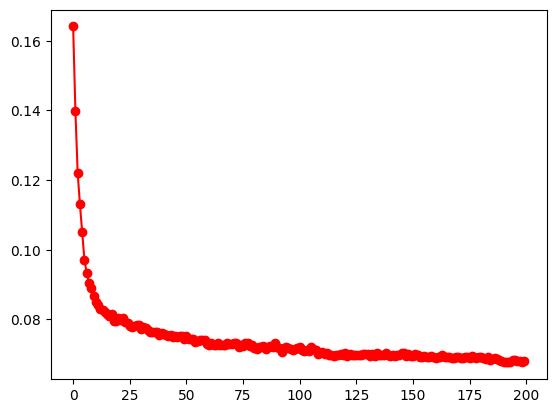

In [49]:
import matplotlib.pyplot as plt

plt.plot(test_losses_epoch, 'o-r')
plt.show()

In [ ]:
inputs = tokenizer(test_sensor_data[0], return_tensors="pt").to(device)
print(test_sensor_data[0])

# need to pad attention_mask and input_ids to be full seq_len + n_learned_tokens
# even though it does not matter what you pad input_ids with, it's just to make HF happy
inputs['input_ids'] = torch.cat([torch.full((1, n_tokens), 1).to(device), inputs['input_ids']], 1)
inputs['attention_mask'] = torch.cat([torch.full((1,n_tokens), 1).to(device), inputs['attention_mask']], 1)
inputs['decoder_input_ids']=torch.full((1, 100), 1).to(device)
 
outputs = model(**inputs)
print(outputs.logits.shape)
output_ids=outputs.logits[:, n_tokens:, :]
print(output_ids.shape)
max_ids=output_ids.argmax(-1).detach().cpu().numpy().tolist()
max_ids[0]=[ids for ids in max_ids[0] if ids!=0]
print(tokenizer.batch_decode(max_ids))

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d%m_%H%M%S")
torch.save(model.state_dict(), "./output/T5_"+dt_string)

In [ ]:
model = MyModel(num_classes).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-2)
output_model = './models/model_xlnet_mid.pth'

# save
def save(model, optimizer):
    # save
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, output_model)

save(model, optimizer)

# load
checkpoint = torch.load(output_model, map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Evaluation

In [ ]:
model = T5ForConditionalGeneration.from_pretrained("t5-base")
model.load_state_dict(torch.load("./output/T5_2404_092246"))
tokenizer = T5Tokenizer.from_pretrained("t5-base")
n_tokens = len(WARNING_DL)
s_wte = SoftEmbedding(model.get_input_embeddings(), 
                      n_tokens=n_tokens, 
                      initialize_from_vocab=initialize_from_vocab)
model.set_input_embeddings(s_wte)
if torch.cuda.is_available():
    model = model.to(device)

In [28]:
from datasets import load_metric

In [44]:
all_true_labels = []
all_pred_labels = []
output_max_pred=[]
test_losses = []
with torch.no_grad():
    pbar = tqdm(enumerate(generate_data(batch_size, n_tokens, test_sensor_data, test_templates)), total=dev_total_batch)
    for i, (x, y, m, dii, true_labels) in pbar:
        all_true_labels += true_labels
        outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)
        
        output_ids=outputs.logits[:, n_tokens:, :]
        max_pred_ids=outputs.logits[:, n_tokens:, :].argmax(-1).detach().cpu().numpy().tolist()
        max_pred_ids[0]=[ids for ids in max_pred_ids[0] if ids!=0]
        output_max_pred.extend(tokenizer.batch_decode(max_pred_ids))
        
        loss = outputs.loss
        loss_value = float(loss.detach().cpu().numpy().tolist()) / batch_size
        test_losses.append(loss_value)
        pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy().tolist()
        all_pred_labels += pred_labels
        pbar.set_description(f'dev: loss={np.mean(test_losses):.4f}')

dev: loss=0.0681:  40%|███████████████▊                       | 21/52 [00:05<00:08,  3.84it/s]


In [45]:
print(output_max_pred)

[": is) The drone is facing the risk of physical damage. There' a too closean", ':04) The drone is facing the risk of physical damage. It is  flying too to to tonan at patha<pad> mm and<pad><pad><pad><pad><pad><pad><pad><pad>', ": is) The drone is facing the risk of physical damage. There' a too<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>", ": is) The drone is facing the risk of physical damage. There' a too close to<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>", ": is) The drone is facing the risk of physical damage. There'sa too close to<pad> n<pad> s<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>", ': is) The drone is facing the risk of physical damage. It is  flying too close<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>', ": is) The drone is facing the risk of physical da

In [46]:
bleu=load_metric("bleu")
rouge=load_metric("rouge")

In [47]:
bleu_preds=[tokenizer.tokenize(pred) for pred in output_max_pred]
bleu_refers=[[tokenizer.tokenize(label)] for label in test_templates]


In [40]:
bleu_score=bleu.compute(predictions=bleu_preds, references=bleu_refers)
print(bleu_score)
rouge_score=rouge.compute(predictions=output_max_pred, references=test_templates)
print(rouge_score)

{'bleu': 0.23139616307058739, 'precisions': [0.3772499262319268, 0.24096476636927264, 0.19168734491315137, 0.1645312748686933], 'brevity_penalty': 1.0, 'length_ratio': 1.254720473898556, 'translation_length': 27112, 'reference_length': 21608}
{'rouge1': AggregateScore(low=Score(precision=0.3044387647778802, recall=0.4097728841999733, fmeasure=0.336800800063576), mid=Score(precision=0.3141724787436936, recall=0.4147040510684562, fmeasure=0.3446008785790675), high=Score(precision=0.32630348679563437, recall=0.4203273813086717, fmeasure=0.35360577511772495)), 'rouge2': AggregateScore(low=Score(precision=0.20887156282969704, recall=0.27152338000109855, fmeasure=0.2280335324804361), mid=Score(precision=0.2183561441003426, recall=0.27932741478333434, fmeasure=0.2367963655126923), high=Score(precision=0.22880964790642702, recall=0.28643270169674945, fmeasure=0.24573852137858143)), 'rougeL': AggregateScore(low=Score(precision=0.27093177560875575, recall=0.3691966810206904, fmeasure=0.301727373

In [51]:
tokenizer.encode("Hello world")

[8774, 296, 1]